In [33]:
#Required Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [34]:
#Read the data
data = pd.read_csv('country-data.csv')

Data Exploration

In [35]:
#View the head of the data set to see column names and layout
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [36]:
#View the data types of the columns and the number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [37]:
#No null values in the data set need to be handled

In [38]:
#View the summary statistics of the data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Data Visualization

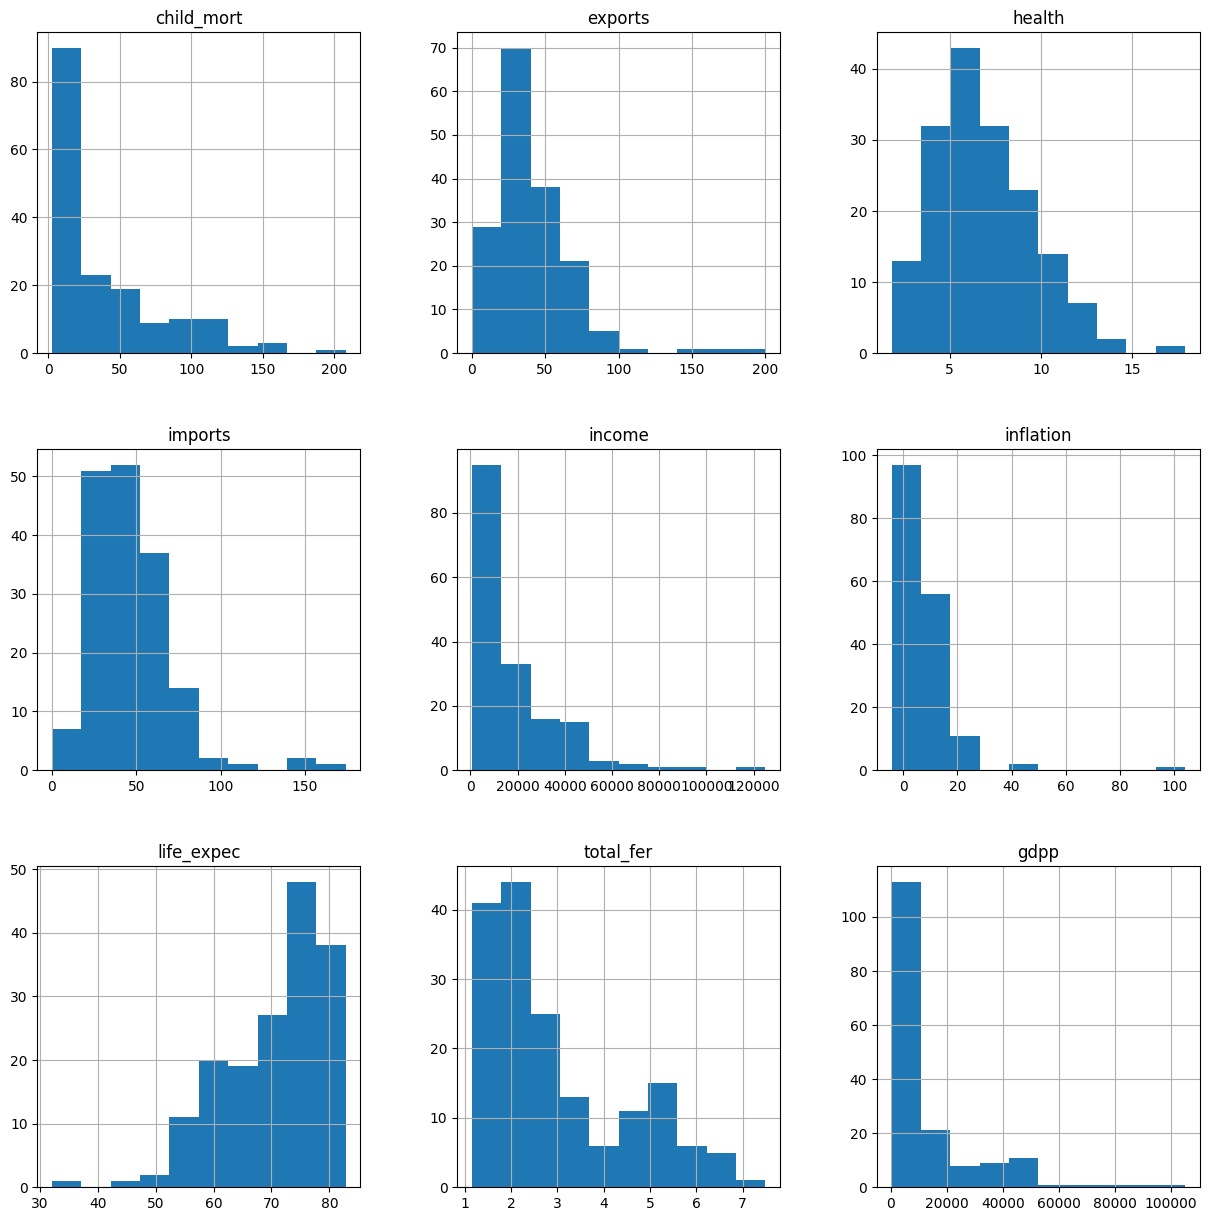

In [39]:
#Plot the distribution of the data set to see if there are any outliers
#Exclude the country column as it is not numeric and is all unique values
data.drop('country', axis=1).hist(figsize=(15,15))
plt.show()

In [40]:
#All of the features are skewed to the right except for health and life expectancy
#These show a normal distribution and a left skew respectively

C:\Users\JFFar\AppData\Local\Temp\ipykernel_17916\41983881.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(data.corr())


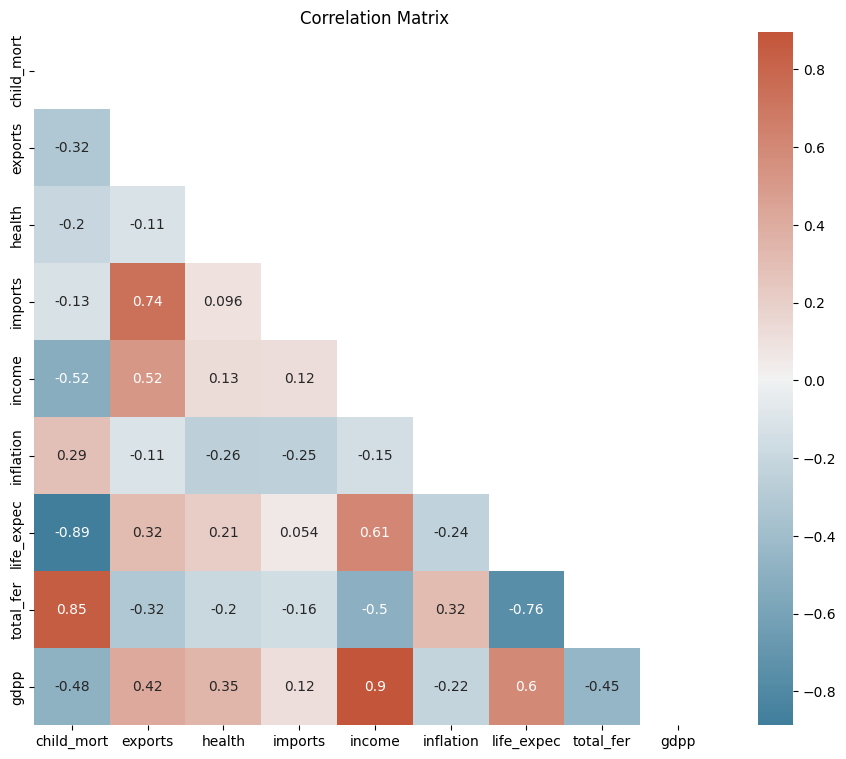

In [41]:
#Plot the correlation matrix to see which features are correlated
#Use upper triangle to remove duplicate values
corr = data.drop('country', axis=1).corr()
mask = np.triu(data.corr())
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap = cmap, cbar = "True", annot = True)
plt.title('Correlation Matrix')
plt.show()

In [42]:
#High correlation between expected features such as income and gdpp or imports and exports
#This is because they are all related to the economy of the country
#There is also a high correlation between features that center around health

K-Means Cluster Model

In [43]:
#Scale the data
#Min max scaler is used as the data is not normally distributed
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop('country', axis=1))

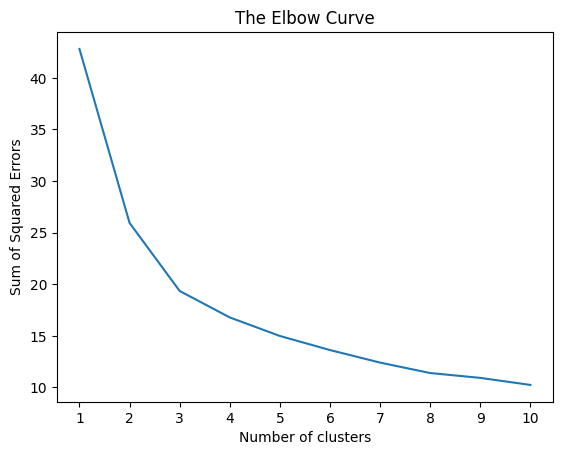

In [44]:
#Plot the elbow curve to determine the optimal number of clusters
#Use the scaled data as the data is not normally distributed
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xticks(np.arange(1, 11, 1))
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [45]:
#The elbow curve shows that the optimal number of clusters is 3
#This is because the sum of squared errors decreases at a slower rate after 3 clusters

In [46]:
#Fit the kmeans model to the data
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled_data)

In [47]:
#Add the cluster labels to the data set
data['Class'] = y_kmeans

In [48]:
#View the new data set
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [49]:
#Countries are no classified but it is not known which class is which

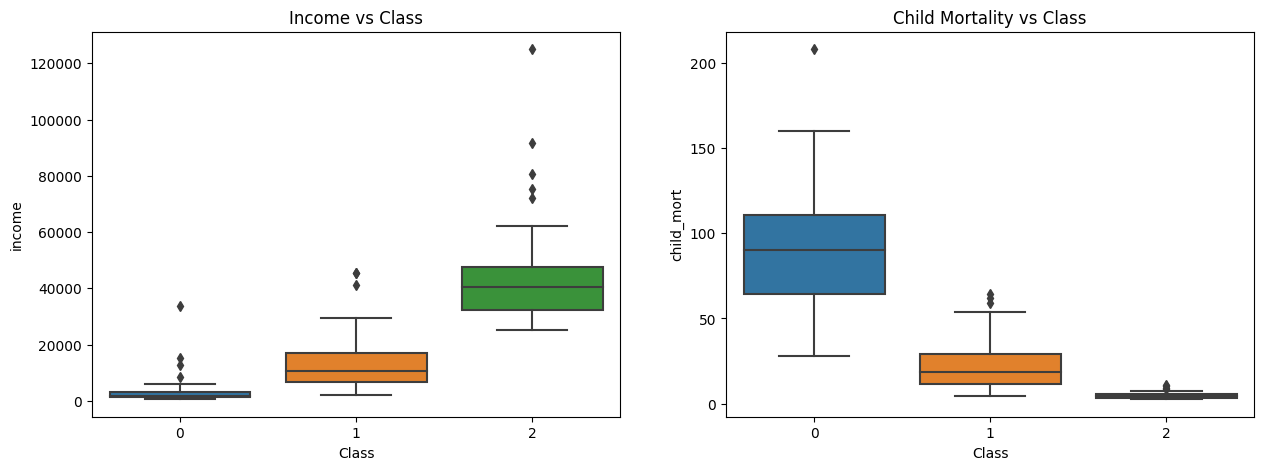

In [51]:
#Plot the clusters to see if there are any trends
#Plot the clusters against the income and child mortality features
#This allows us to compare an economic feature and a health feature
#Use box plots to show the distribution of the clusters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='Class', y='income', data=data)
plt.title('Income vs Class')
plt.subplot(1,2,2)
sns.boxplot(x='Class', y='child_mort', data=data)
plt.title('Child Mortality vs Class')
plt.show()

In [ ]:
#These plots show that:
#Class 0 is for countries that need help as income is low and child mortality is high
#Class 1 is for countries that might need help as income isn't much higher but child mortality is lower
#Class 2 is for countries that don't need help as income is high and child mortality is low

In [52]:
#Change numeric values to labels
data['Class'] = data['Class'].map({0:'Needs Help', 1:'Might Need Help', 2:'Does Not Need Help'})

In [54]:
#View the new data set
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Needs Help
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Might Need Help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Might Need Help
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Needs Help
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Might Need Help
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Might Need Help
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Might Need Help
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Does Not Need Help
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Does Not Need Help
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Might Need Help
